In [1]:

import pandas as pd
# import tensorflow as tf
import os
import datetime
import numpy as np

from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

In [2]:
#import csv
scores_df=pd.read_csv("../resources/merged_df.csv")
scores_df

,Unnamed: 0,Competition Title,Competition Date,FIRST,LAST,Nation,StartNr,Rank,Qualification,Semifinal,...,Quali_Atempts_Tops,Quali_Attempts_Zones,semi_Tops,semi_Zones,semi_Atempts_Tops,semi_Attempts_Zones,Finals_Tops,Finals_Zones,Final_Atempts_Tops,Final_Attempts_Zones
0,0,European Youth Championships (B) - Brixen (ITA...,20 - 22 September 2019,Naile,MEIGNAN,FRA,15.0,1,6T7z99,3T4z55,...,9,9,3,4,5,5,3,4,8,9
1,1,European Youth Championships (B) - Brixen (ITA...,20 - 22 September 2019,Miriam,FOGU,ITA,27.0,2,4T8z814,3T4z55,...,8,4,3,4,5,5,2,4,2,7
2,2,European Youth Championships (B) - Brixen (ITA...,20 - 22 September 2019,Vanda,MICHALKOVA,SVK,48.0,3,6T7z89,3T3z43,...,8,9,3,3,4,3,2,3,2,3
3,3,European Youth Championships (B) - Brixen (ITA...,20 - 22 September 2019,Lola,SAUTIER,FRA,17.0,4,4T6z69,2T3z89,...,6,9,2,3,8,9,1,3,3,8
4,4,European Youth Championships (B) - Brixen (ITA...,20 - 22 September 2019,Polina,KULAGINA,RUS,39.0,5,4T6z611,3T4z76,...,6,1,3,4,7,6,1,3,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2428,5427,European Youth Cup (B) - Soure (POR) 2018,5 - 6 May 2018,solene,MOREAU,FRA,44.0,13,5T8z510,NaN,...,3,6,0,0,0,0,0,0,0,0
2429,5428,European Youth Cup (B) - Soure (POR) 2018,5 - 6 May 2018,Lucie,VAILLANT BULTEL,FRA,45.0,14,5T7z99,NaN,...,4,7,0,0,0,0,0,0,0,0
2430,5429,European Youth Cup (B) - Soure (POR) 2018,5 - 6 May 2018,Helena,WALTZ,GER,81.0,15,5T7z1111,NaN,...,5,7,0,0,0,0,0,0,0,0
2431,5430,European Youth Cup (B) - Soure (POR) 2018,5 - 6 May 2018,Marie,COLOT,BEL,10.0,16,5T6z98,NaN,...,0,5,0,0,0,0,0,0,0,0


In [3]:
scores_df.columns

Index(['Unnamed: 0', 'Competition Title', 'Competition Date', 'FIRST', 'LAST',
       'Nation', 'StartNr', 'Rank', 'Qualification', 'Semifinal', 'Final',
       'Category', 'Quali_Tops', 'Quali_Zones', 'Quali_Atempts_Tops',
       'Quali_Attempts_Zones', 'semi_Tops', 'semi_Zones', 'semi_Atempts_Tops',
       'semi_Attempts_Zones', 'Finals_Tops', 'Finals_Zones',
       'Final_Atempts_Tops', 'Final_Attempts_Zones'],
      dtype='object')

In [4]:
scores_df=scores_df.drop(columns=["FIRST","LAST","Qualification","Semifinal","Final","Category","Unnamed: 0",'Competition Title'])
scores_df

,Competition Date,Nation,StartNr,Rank,Quali_Tops,Quali_Zones,Quali_Atempts_Tops,Quali_Attempts_Zones,semi_Tops,semi_Zones,semi_Atempts_Tops,semi_Attempts_Zones,Finals_Tops,Finals_Zones,Final_Atempts_Tops,Final_Attempts_Zones
0,20 - 22 September 2019,FRA,15.0,1,6,7,9,9,3,4,5,5,3,4,8,9
1,20 - 22 September 2019,ITA,27.0,2,4,8,8,4,3,4,5,5,2,4,2,7
2,20 - 22 September 2019,SVK,48.0,3,6,7,8,9,3,3,4,3,2,3,2,3
3,20 - 22 September 2019,FRA,17.0,4,4,6,6,9,2,3,8,9,1,3,3,8
4,20 - 22 September 2019,RUS,39.0,5,4,6,6,1,3,4,7,6,1,3,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2428,5 - 6 May 2018,FRA,44.0,13,1,2,3,6,0,0,0,0,0,0,0,0
2429,5 - 6 May 2018,FRA,45.0,14,1,2,4,7,0,0,0,0,0,0,0,0
2430,5 - 6 May 2018,GER,81.0,15,1,2,5,7,0,0,0,0,0,0,0,0
2431,5 - 6 May 2018,BEL,10.0,16,0,2,0,5,0,0,0,0,0,0,0,0


In [5]:
scores_df.nunique()

Competition Date         16
Nation                   63
StartNr                 544
Rank                     67
Quali_Tops                9
Quali_Zones               9
Quali_Atempts_Tops       10
Quali_Attempts_Zones     22
semi_Tops                 5
semi_Zones                5
semi_Atempts_Tops        10
semi_Attempts_Zones      18
Finals_Tops               5
Finals_Zones              5
Final_Atempts_Tops       10
Final_Attempts_Zones     19
dtype: int64

In [6]:
scores_df["Competition Date"].value_counts()

11  - 12 May 2019               328
31 August - 2 September 2018    301
20  - 22 September 2019         282
25  - 26 May 2019               258
27  - 28 April 2019             241
2  - 3 June 2018                211
21  - 22 July 2018              193
1  - 4 November 2018            151
5  - 7 September 2019            91
7  - 11 November 2018            87
22  - 31 August 2019             59
15  - 17 June 2018               59
21  - 26 November 2018           55
9  - 16 August 2018              51
9  - 10 March 2019               49
5  - 6 May 2018                  17
Name: Competition Date, dtype: int64

In [7]:
scores_df["Nation"].value_counts()

ITA    161
FRA    150
AUT    122
BEL    114
GER    107
      ... 
KGZ      3
RSA      2
PER      2
NEP      2
MEX      1
Name: Nation, Length: 63, dtype: int64

In [8]:
encoded_df = pd.get_dummies(scores_df, columns=["Nation"])
encoded_df

,Competition Date,StartNr,Rank,Quali_Tops,Quali_Zones,Quali_Atempts_Tops,Quali_Attempts_Zones,semi_Tops,semi_Zones,semi_Atempts_Tops,...,Nation_SRB,Nation_SUI,Nation_SVK,Nation_SWE,Nation_THA,Nation_TPE,Nation_TUR,Nation_UKR,Nation_USA,Nation_VEN
0,20 - 22 September 2019,15.0,1,6,7,9,9,3,4,5,...,0,0,0,0,0,0,0,0,0,0
1,20 - 22 September 2019,27.0,2,4,8,8,4,3,4,5,...,0,0,0,0,0,0,0,0,0,0
2,20 - 22 September 2019,48.0,3,6,7,8,9,3,3,4,...,0,0,1,0,0,0,0,0,0,0
3,20 - 22 September 2019,17.0,4,4,6,6,9,2,3,8,...,0,0,0,0,0,0,0,0,0,0
4,20 - 22 September 2019,39.0,5,4,6,6,1,3,4,7,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2428,5 - 6 May 2018,44.0,13,1,2,3,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2429,5 - 6 May 2018,45.0,14,1,2,4,7,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2430,5 - 6 May 2018,81.0,15,1,2,5,7,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2431,5 - 6 May 2018,10.0,16,0,2,0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
encoded_df.dtypes

Competition Date     object
StartNr             float64
Rank                  int64
Quali_Tops            int64
Quali_Zones           int64
                     ...   
Nation_TPE            uint8
Nation_TUR            uint8
Nation_UKR            uint8
Nation_USA            uint8
Nation_VEN            uint8
Length: 78, dtype: object

In [10]:
import re

def fix_date(date_string):
    regex_pattern = r"^(\d{1,2})\s-\s\d{1,2}\s(\w+)\s(\d{4})"
    match_obj = re.match(regex_pattern, date_string)

    if match_obj:
        output_str = f"{match_obj.group(1)} {match_obj.group(2)} {match_obj.group(3)}"
        print(output_str)
    else:
        print("No match found")
    return output_str

In [11]:
dates = encoded_df['Competition Date'].str.extractall(r"^(\d{1,2})\s*(-\s*(\d{1,2})\s+)?(\w+)\s+(\d{4})?")
dates = pd.DataFrame(dates)
dates = dates.reset_index().drop(columns=["match", "level_0",1,2]).reset_index()
dates = dates.drop(columns=["index"])
dates.columns=["day","month","year"]
dates["month"]=pd.to_datetime(dates["month"],format="%B")
dates["month"]=dates["month"].dt.month
dates = dates.fillna(9)
dates.astype({'day':'int64','year':'int64'}).dtypes
dates

,day,month,year
0,20,9,2019
1,20,9,2019
2,20,9,2019
3,20,9,2019
4,20,9,2019
...,...,...,...
2428,5,5,2018
2429,5,5,2018
2430,5,5,2018
2431,5,5,2018


In [12]:
merger_dates_df = pd.merge(encoded_df, dates, left_index=True, right_index=True)
df = merger_dates_df.drop(columns=['Competition Date'])

In [13]:
df


,StartNr,Rank,Quali_Tops,Quali_Zones,Quali_Atempts_Tops,Quali_Attempts_Zones,semi_Tops,semi_Zones,semi_Atempts_Tops,semi_Attempts_Zones,...,Nation_SWE,Nation_THA,Nation_TPE,Nation_TUR,Nation_UKR,Nation_USA,Nation_VEN,day,month,year
0,15.0,1,6,7,9,9,3,4,5,5,...,0,0,0,0,0,0,0,20,9,2019
1,27.0,2,4,8,8,4,3,4,5,5,...,0,0,0,0,0,0,0,20,9,2019
2,48.0,3,6,7,8,9,3,3,4,3,...,0,0,0,0,0,0,0,20,9,2019
3,17.0,4,4,6,6,9,2,3,8,9,...,0,0,0,0,0,0,0,20,9,2019
4,39.0,5,4,6,6,1,3,4,7,6,...,0,0,0,0,0,0,0,20,9,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2428,44.0,13,1,2,3,6,0,0,0,0,...,0,0,0,0,0,0,0,5,5,2018
2429,45.0,14,1,2,4,7,0,0,0,0,...,0,0,0,0,0,0,0,5,5,2018
2430,81.0,15,1,2,5,7,0,0,0,0,...,0,0,0,0,0,0,0,5,5,2018
2431,10.0,16,0,2,0,5,0,0,0,0,...,0,0,0,0,0,0,0,5,5,2018


In [14]:
# Clean up of target variable, top 6 for each competition as 1 and rest 0
top_n = 6  # Define the number of top ranks you want to set to 1
# Create a new column named 'rank_top' with all values initialized to 0
df['rank_top'] = np.zeros(len(df))
# Set the top 'top_n' ranks to 1 in the 'rank_top' column
df.loc[df['Rank'] <= top_n, 'rank_top'] = 1

In [19]:
df=df.dropna()

In [37]:
pip install pydotplus

     |████████████████████████████████| 278 kB 1.5 MB/s eta 0:00:01
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24575 sha256=a3cced0e78defcf12e733faed0bdeb7e0a30816d0b46da6e4f73df1b797bbe7b
  Stored in directory: /Users/aditibindlish/Library/Caches/pip/wheels/89/e5/de/6966007cf223872eedfbebbe0e074534e72e9128c8fd4b55eb
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


In [21]:
# Define features set
X = df.copy()
X.drop(["Rank","rank_top"], axis=1, inplace=True)
X.head()

,StartNr,Quali_Tops,Quali_Zones,Quali_Atempts_Tops,Quali_Attempts_Zones,semi_Tops,semi_Zones,semi_Atempts_Tops,semi_Attempts_Zones,Finals_Tops,...,Nation_SWE,Nation_THA,Nation_TPE,Nation_TUR,Nation_UKR,Nation_USA,Nation_VEN,day,month,year
0,15.0,6,7,9,9,3,4,5,5,3,...,0,0,0,0,0,0,0,20,9,2019
1,27.0,4,8,8,4,3,4,5,5,2,...,0,0,0,0,0,0,0,20,9,2019
2,48.0,6,7,8,9,3,3,4,3,2,...,0,0,0,0,0,0,0,20,9,2019
3,17.0,4,6,6,9,2,3,8,9,1,...,0,0,0,0,0,0,0,20,9,2019
4,39.0,4,6,6,1,3,4,7,6,1,...,0,0,0,0,0,0,0,20,9,2019


In [22]:
# Define target vector
y = df["rank_top"].ravel()
y[:5]

array([1., 1., 1., 1., 1.])

In [23]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [24]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [25]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [26]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [27]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [28]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [20]:
df.isnull().sum().sort_values()

StartNr       0
Nation_NZL    0
Nation_NOR    0
Nation_NEP    0
Nation_NED    0
             ..
Nation_CHI    0
Nation_CAN    0
Nation_CAM    0
Nation_IND    0
rank_top      0
Length: 81, dtype: int64

In [29]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [30]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [31]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,468,7
Actual 1,50,32


Accuracy Score : 0.8976660682226212
Classification Report
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94       475
         1.0       0.82      0.39      0.53        82

    accuracy                           0.90       557
   macro avg       0.86      0.69      0.74       557
weighted avg       0.89      0.90      0.88       557



In [32]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.13963799585059078, 'StartNr'),
 (0.08577372597927398, 'Quali_Attempts_Zones'),
 (0.07598122005999705, 'Quali_Zones'),
 (0.06943085189541474, 'Quali_Atempts_Tops'),
 (0.06897692464528367, 'Quali_Tops'),
 (0.06407966528301115, 'day'),
 (0.05981480047347614, 'month'),
 (0.03950596595667802, 'Nation_FRA'),
 (0.0327786019630895, 'Nation_JPN'),
 (0.026492580994272777, 'semi_Tops'),
 (0.02613709071241712, 'year'),
 (0.02496632361468909, 'Nation_AUT'),
 (0.022617339054552033, 'Final_Attempts_Zones'),
 (0.02259943200582515, 'semi_Atempts_Tops'),
 (0.019014260464543877, 'Final_Atempts_Tops'),
 (0.018830886609975603, 'semi_Attempts_Zones'),
 (0.01671164737089264, 'semi_Zones'),
 (0.016389352973553224, 'Nation_SLO'),
 (0.015697710240340116, 'Finals_Zones'),
 (0.013703910830630285, 'Finals_Tops'),
 (0.013310455822011054, 'Nation_ITA'),
 (0.009787111960135843, 'Nation_GER'),
 (0.00834932153706721, 'Nation_GBR'),
 (0.007471629545519894, 'Nation_BUL'),
 (0.0071967452866916175, 'Nation_RUS'),
 (0.0

<AxesSubplot:title={'center':'Features Importances'}, ylabel='1'>

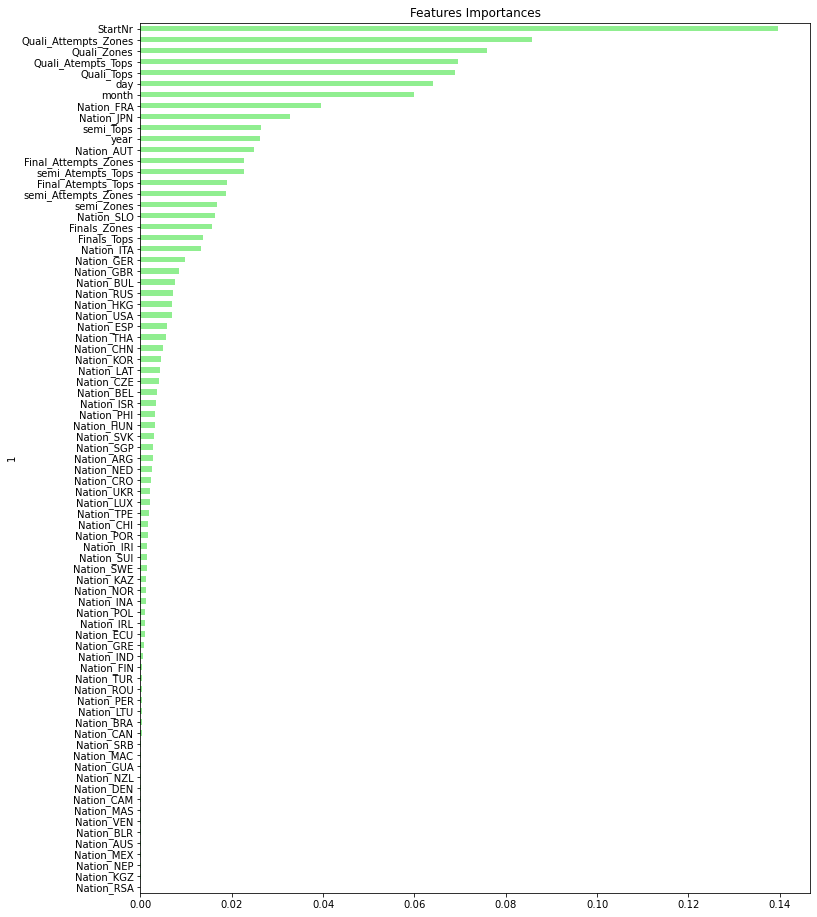

In [40]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False, figsize=(12,16))